In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the space-delimited file
data = np.loadtxt('WFSCsim.out6')

# Read columns 1 and 4; its= sensing cadence and rms=WFE at various timesteps in various Monte-Carlo runs  
its = data[:,0]
rms = data[:,3]

In [2]:
# Set the bin limits for WFE histograms, with bin size = 1
bins=np.arange(50, 141, 1)
# print(bins)

# Set up an array of the itsvalues that we are interested in and are included in the input file
itsvals = np.arange (2, 15, 1)
# print(itsvals)

# Set up an array of WFE values for calculating cumulative probabilities
binmins=np.arange(50,141,1)
# print(binmins)

# Note that the bin arrays run only up to 140 nm. So this means that "big WFE jumps" are excluded from the 
# statistics, as long as these elevate the WFE beyond 140 nm, as is the case in my simulations. This is 
# appropriate, because these observations are going to be repeated, in my simulations, so they don't contribute
# WFE quality histogram of the non-failed observations in the Archive. The statistics DO include the observations
# with delta WFE < 60 nm that are repeated, but that is only a small number.

In [3]:
# help(plt.hist)

In [4]:
# Create a 2D array initialized with zeros
prob = [[0 for _ in binmins] for _ in itsvals]
# print(prob)

# Loop over the its values, and calculate the normalized histograms without plotting them. 
# Also calculate the cumulative percentages over specfic RMS values and store those in a 2D array

icur = -1
for i in itsvals:
    icur = icur + 1
    rmsi = rms[its==i]
#    rmsdens, bins, patches = plt.hist(rmsi, bins, density='True', histtype='step', linewidth=0)
    rmsdens, bins = np.histogram(rmsi, bins, density='True')
    jcur = -1
    for j in binmins:
        jcur = jcur + 1
        rmssel = rmsdens[(bins[1:] > j) & (bins[1:] <= 140)]
        prob[icur][jcur] = sum(rmssel)

# print(prob)

# 03/28/2025: I did a careful assessment of the indexing of the array prob. 
# It is defined such that binmins[0] = 50 nm and prob[icur][0] = p(>50 nm), being the fraction oif observations with WFE > 50 nm.
# This is helpful in interperting the printing of the array in the cell further down. 

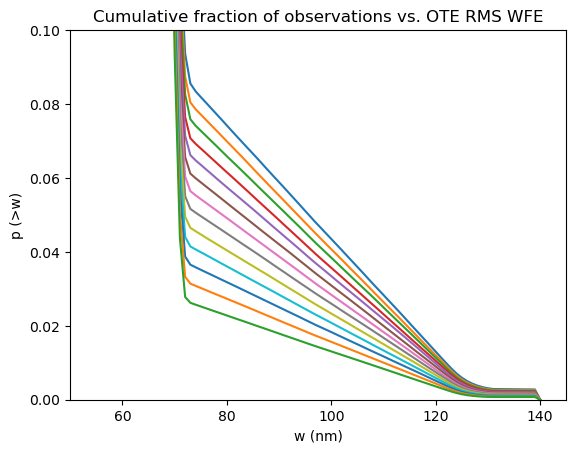

In [5]:
# make a plot of the cumulative percentages for the different its values

# Set plots limits and labels
plt.xlim(50, 145)
plt.ylim(0, 0.10)
plt.xlabel('w (nm)')
plt.ylabel('p (>w)')
plt.title('Cumulative fraction of observations vs. OTE RMS WFE')

# Create a 1D array initialized with zeros
prob1 = [0 for _ in binmins]
# print(prob1)

# Loop over its values. Fill the 1D array with the probabilities, and plot

# either start at icur = -1 and go up, or start at icur = 13 and go down
# that just changes the colors of the curves. 
icur = len(itsvals)
for i in itsvals:
    icur = icur - 1
    jcur = -1
    for j in binmins:
        jcur = jcur + 1
        prob1[jcur] = prob[icur][jcur]
#   print(prob1)
    plt.plot(binmins,prob1)

# save to jpg file
plt.savefig('WFSCsim_tails_histograms1a.jpg')

In [6]:
# Write the array for a cadence of 4 days (the second array element; 2-day cadence is zero)
jcur = -1
for j in binmins:
    jcur = jcur + 1
    print(binmins[jcur],prob[2][jcur])

50 0.9999999999999997
51 0.9999999999999997
52 0.9999999999999997
53 0.9999999999999997
54 0.9999999999999997
55 0.9999999999999997
56 0.9999999999999997
57 0.9999999999999997
58 0.9999999999999997
59 0.9999999999999997
60 0.9999998622741245
61 0.9999393661834562
62 0.9947585319372011
63 0.9156040283303498
64 0.7590757822511215
65 0.5971476144897122
66 0.46217291697102664
67 0.3498668999926628
68 0.25549864531107613
69 0.17540946505238625
70 0.10714752875535508
71 0.05694644725603402
72 0.03873526466557626
73 0.03654067170768619
74 0.03583568738416178
75 0.03515707756573234
76 0.03448328815293384
77 0.033822444972401285
78 0.033142010286125845
79 0.03246970142648543
80 0.031801627637506456
81 0.031132348747119763
82 0.0304615548721062
83 0.02977760817601394
84 0.02909910165199088
85 0.02841756515871409
86 0.02774226076128872
87 0.027060655405074345
88 0.026384972261492265
89 0.025701473174494307
90 0.0250204531532494
91 0.02433919211172295
92 0.023663302379328108
93 0.02298696503783897

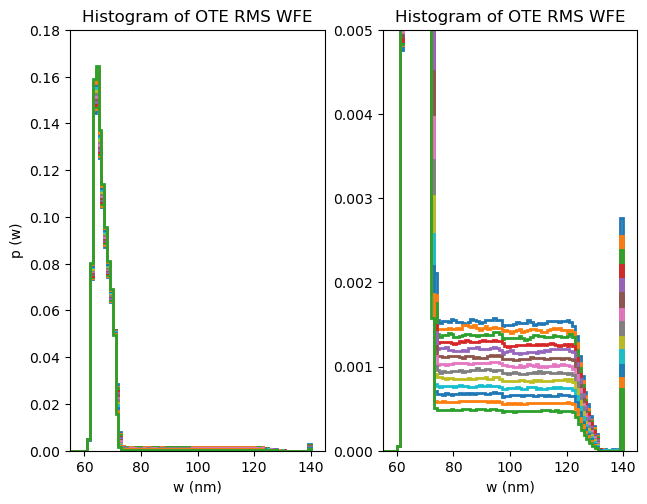

In [7]:
f, (ax1,ax2) = plt.subplots(1,2)

plt.tight_layout()

ax1.set_xlim(55, 145)
ax1.set_ylim(0, 0.18)   
ax1.set_xlabel('w (nm)')
ax1.set_ylabel('p (w)')
ax1.set_title('Histogram of OTE RMS WFE')

for i in reversed(itsvals):
    rmsi = rms[its==i]
    ax1.hist(rmsi, bins, density='True', histtype='step', linewidth=2)

ax2.set_xlim(55, 145)
ax2.set_ylim(0, 0.005)   
ax2.set_xlabel('w (nm)')
ax2.set_ylabel('')
ax2.set_title('Histogram of OTE RMS WFE')

for i in reversed(itsvals):
    rmsi = rms[its==i]
    ax2.hist(rmsi, bins, density='True', histtype='step', linewidth=2)

# save to jpg file
plt.savefig('WFSCsim_tails_histograms1b.jpg')